In [5]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [6]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8
dataset = r"C:\Users\ELCOT\Downloads\SWE3004\Data//" #The Dataset
args={}
args["dataset"]=dataset

In [7]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

Normal Chest X-ray Vs Covid-19 Chest X-ray


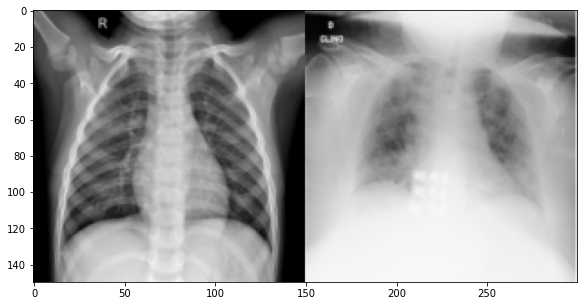

Normal Chest X-ray Vs Covid-19 Chest X-ray


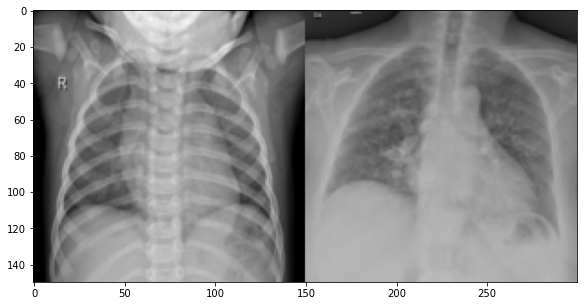

Normal Chest X-ray Vs Covid-19 Chest X-ray


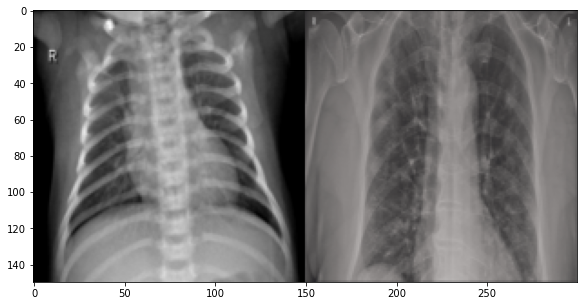

Normal Chest X-ray Vs Covid-19 Chest X-ray


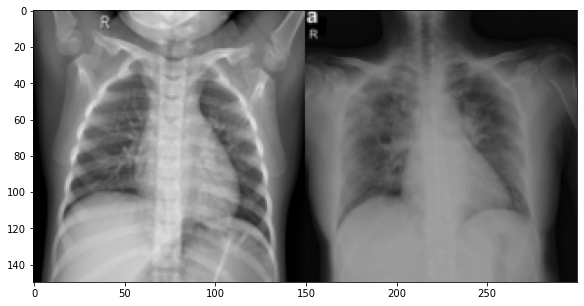

Normal Chest X-ray Vs Covid-19 Chest X-ray


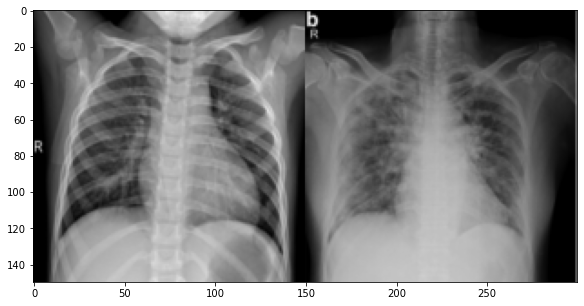

In [7]:
import os
dataset = r"C:\Users\ELCOT\Downloads\SWE3004\Data//"
Cimages = os.listdir(dataset+"Covid")
Nimages = os.listdir(dataset+"Normal")
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(dataset+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [8]:
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [9]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [10]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

C:\Users\ELCOT\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


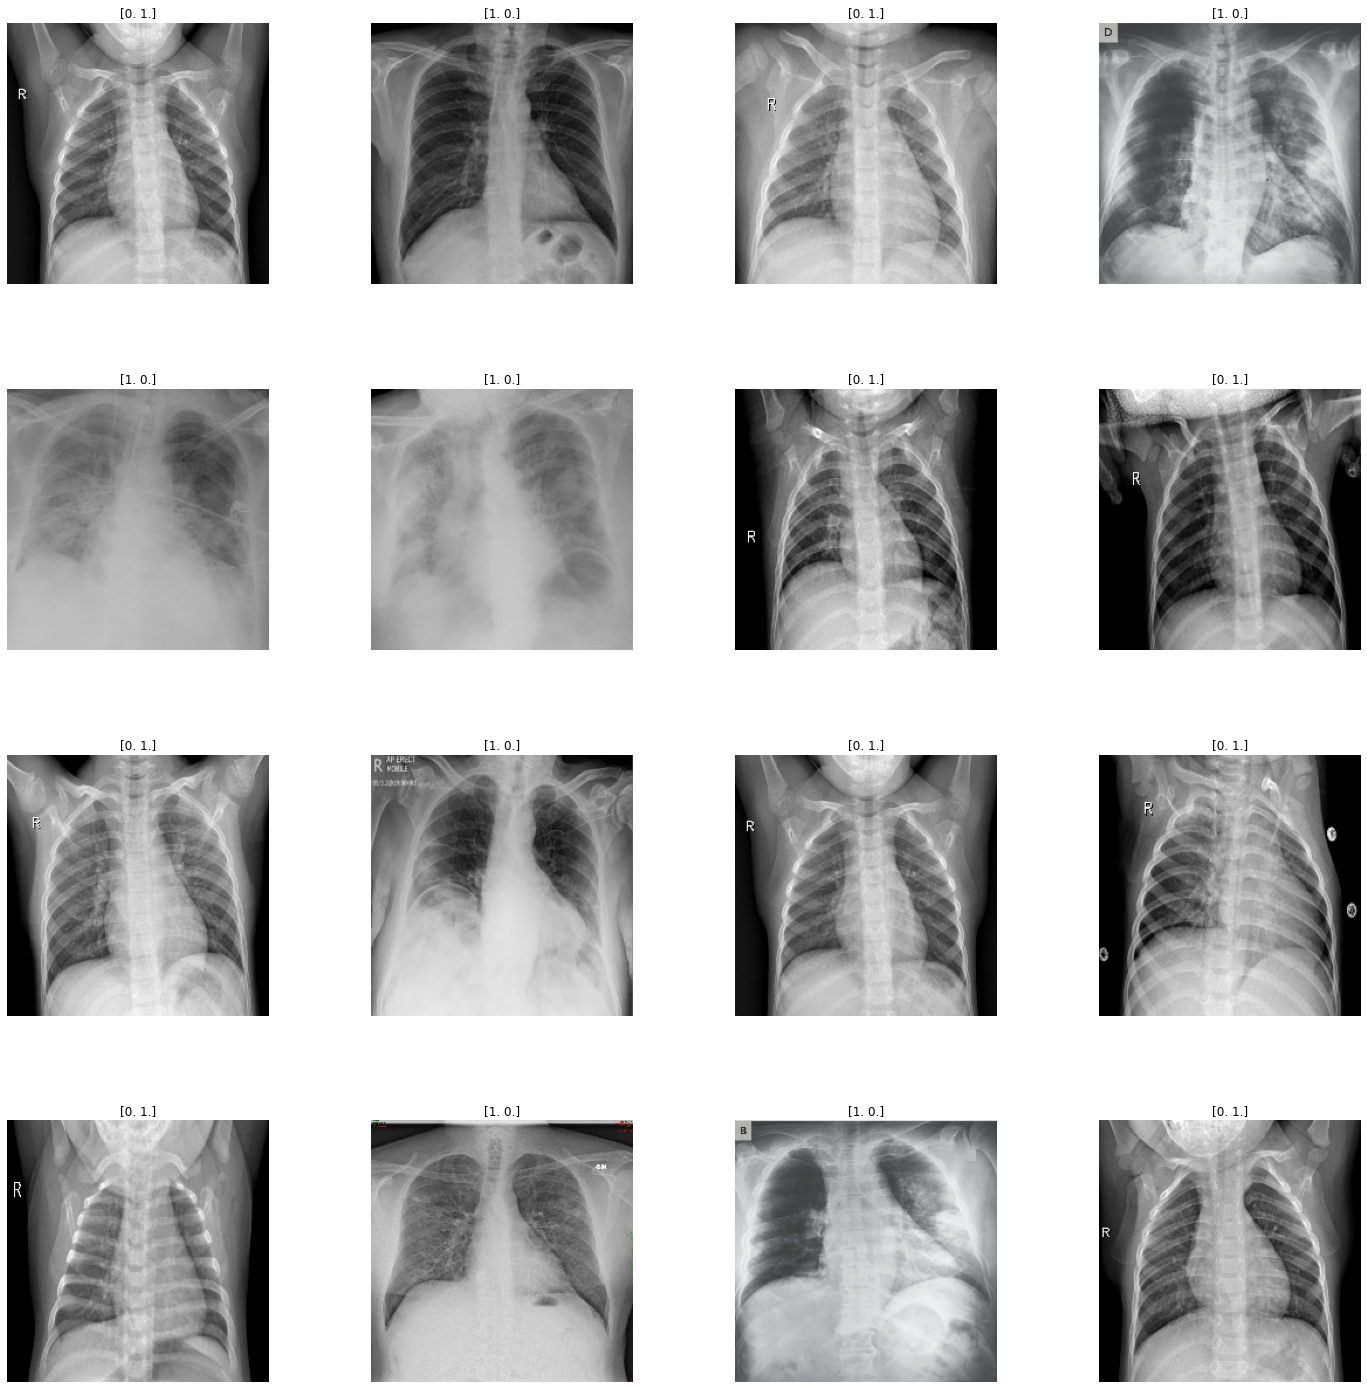

In [11]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4) #hspace indicates the space between the height of the images

In [12]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 230s 11s/step - loss: 0.6924 - accuracy: 0.5625 - val_loss: 0.5435 - val_accuracy: 0.8000
Epoch 2/10
20/20 [==============================] - 227s 11s/step - loss: 0.5723 - accuracy: 0.7063 - val_loss: 0.4146 - val_accuracy: 0.8750
Epoch 3/10
20/20 [==============================] - 226s 11s/step - loss: 0.3848 - accuracy: 0.8938 - val_loss: 0.3249 - val_accuracy: 0.9250
Epoch 4/10
20/20 [==============================] - 229s 11s/step - loss: 0.2846 - accuracy: 0.9375 - val_loss: 0.2501 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 230s 11s/step - loss: 0.2317 - accuracy: 0.9563 - val_loss: 0.2069 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 236s 12s/step - loss: 0.1779 - accuracy: 0.9812 - val_loss: 0.1717 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 226

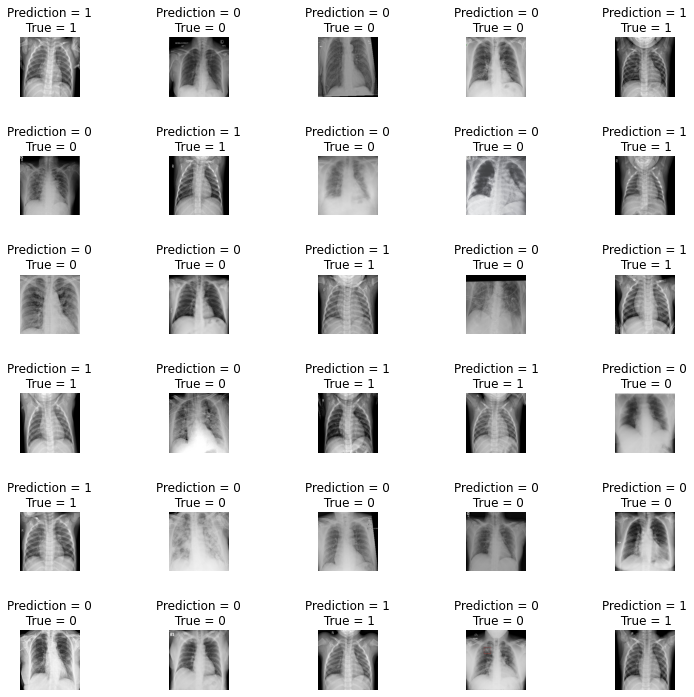

In [13]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1, hspace=1)

In [14]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

 Data//Covid       1.00      1.00      1.00        20
Data//Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


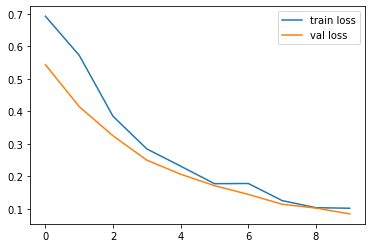

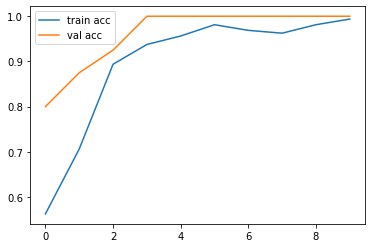

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Validation_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Validation_accuracy')

In [20]:
import tensorflow as tf
from keras.models import load_model
model.save(r'C:\Users\ELCOT\Downloads\SWE3004\model.h5')

In [21]:
#Load and compile the model.

In [23]:
import tensorflow as tf 
model = tf.keras.models.load_model(r'C:\Users\ELCOT\Downloads\SWE3004\model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input

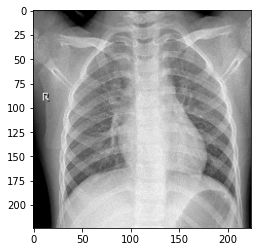

In [26]:
img = image.load_img(r'C:\Users\ELCOT\Downloads\SWE3004\Data\Normal\IM-0176-0001.jpeg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)

In [27]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [28]:
x

array([[[[104., 104., 104.],
         [103., 103., 103.],
         [ 97.,  97.,  97.],
         ...,
         [116., 116., 116.],
         [121., 121., 121.],
         [121., 121., 121.]],

        [[108., 108., 108.],
         [109., 109., 109.],
         [103., 103., 103.],
         ...,
         [115., 115., 115.],
         [121., 121., 121.],
         [122., 122., 122.]],

        [[106., 106., 106.],
         [108., 108., 108.],
         [115., 115., 115.],
         ...,
         [110., 110., 110.],
         [112., 112., 112.],
         [121., 121., 121.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 30.,  30.,  30.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 31.,  31.,  31.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [29]:
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [30]:
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Normal


In [31]:
#another prediction

Prediction: Corona


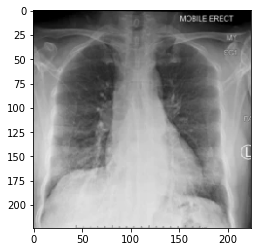

In [32]:
img = image.load_img(r'C:\Users\ELCOT\Downloads\SWE3004\Data\Covid\41591_2020_819.png', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')